In [33]:
# Enable autoreload for updated modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import argparse

# Create a namespace object to hold the arguments
args = argparse.Namespace()

# Arguments from plume_box_run.sh
args.hyper_path = './data'
args.dataset_file = 'hyper_seg'
args.pretrained = True
args.output_dir = './exps/box_model'
args.batch_size = 1
args.num_workers = 8

# Default arguments from hyper_main.py
# args.lr = 1e-4
args.lr_backbone = 1e-5
# args.weight_decay = 1e-4
# args.epochs = 500
# args.lr_drop = 150
# args.clip_max_norm = 0.1
# args.use_wandb = False
args.frozen_weights = None
args.backbone = 'resnet50'
# args.dilation = False
args.position_embedding = 'sine'
args.enc_layers = 6
args.dec_layers = 6
args.dim_feedforward = 2048
args.hidden_dim = 256
args.dropout = 0.1
args.nheads = 8
args.num_queries = 100
args.pre_norm = False
args.masks = True
args.aux_loss = True
args.set_cost_class = 1
args.set_cost_bbox = 5
args.set_cost_giou = 2
args.mask_loss_coef = 1
args.dice_loss_coef = 1
args.bbox_loss_coef = 5
args.giou_loss_coef = 2
args.eos_coef = 0.1
args.remove_difficult = False
args.device = 'cuda'
# args.seed = 42
# args.resume = ''
# args.start_epoch = 0
# args.eval = False
# args.world_size = 1
# args.dist_url = 'env://'
# This is set by utils.init_distributed_mode, assuming False for notebook context
# args.distributed = False

In [35]:
from datasets import build_dataset

In [36]:
dataset_train = build_dataset(image_set="train", args=args)

loading annotations into memory...


creating annotations list
Successfully loaded 13885 annotations
Sample annotation: {'segmentation': [[[36, 58], [35, 59], [34, 60], [34, 61], [34, 62], [34, 63], [35, 64], [36, 65], [37, 65], [38, 65], [39, 65], [40, 66], [41, 65], [42, 64], [43, 64], [43, 63], [43, 62], [42, 61], [41, 61], [40, 60], [39, 59], [38, 59], [37, 58]]], 'bbox': [[58, 34, 66, 43]], 'category_id': [1], 'image_id': 1}
creating image paths list
Found ang20160910t185702_S00006_20_4
Found ang20160910t185702_S00006_19_2
Found ang20160910t185702_S00006_20_3
Found ang20160910t185702_S00006_20_2
Found ang20160910t185702_S00006_19_3
Found ang20160910t185702_S00006_19_4
Found 6 valid image sets out of 13885 annotations
loading mean and std for each band...


In [37]:
import matplotlib.pyplot as plt

In [38]:
id = 5
print(dataset_train[id])

rgb = dataset_train[id]['rgb'].permute(1, 2, 0)
mf = dataset_train[id]['mf'].squeeze(0)
box = dataset_train[id]['target']['boxes']
mask = dataset_train[id]['target']['masks']
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())

{'rgb': tensor([[[ 1.1358,  0.5707,  0.1083,  ...,  2.2489,  2.2489,  2.2489],
         [ 0.8104,  0.4679,  0.2453,  ...,  2.2489,  2.2489,  2.2489],
         [ 0.7419,  1.0502,  0.8104,  ...,  2.2489,  2.2489,  2.2489],
         ...,
         [ 0.2453,  0.1083,  0.1083,  ...,  2.2489,  2.2489,  2.2489],
         [ 1.0159,  0.5707,  0.1083,  ...,  2.2489,  2.2489,  2.2489],
         [ 1.2385,  1.1015,  0.5707,  ...,  2.2489,  2.2489,  2.2489]],

        [[ 1.4832,  0.9755,  0.6604,  ...,  2.4286,  2.4286,  2.4286],
         [ 1.1856,  0.9755,  0.6604,  ...,  2.4286,  2.4286,  2.4286],
         [ 1.1856,  1.4832,  1.1856,  ...,  2.4286,  2.4286,  2.4286],
         ...,
         [ 0.2402,  0.2402,  0.2402,  ...,  2.4286,  2.4286,  2.4286],
         [ 1.1856,  0.6604,  0.2402,  ...,  2.4286,  2.4286,  2.4286],
         [ 1.3431,  1.1856,  0.6604,  ...,  2.4286,  2.4286,  2.4286]],

        [[ 1.7685,  0.9145,  0.5311,  ...,  2.6400,  2.6400,  2.6400],
         [ 1.3154,  0.9145,  0.6879, 

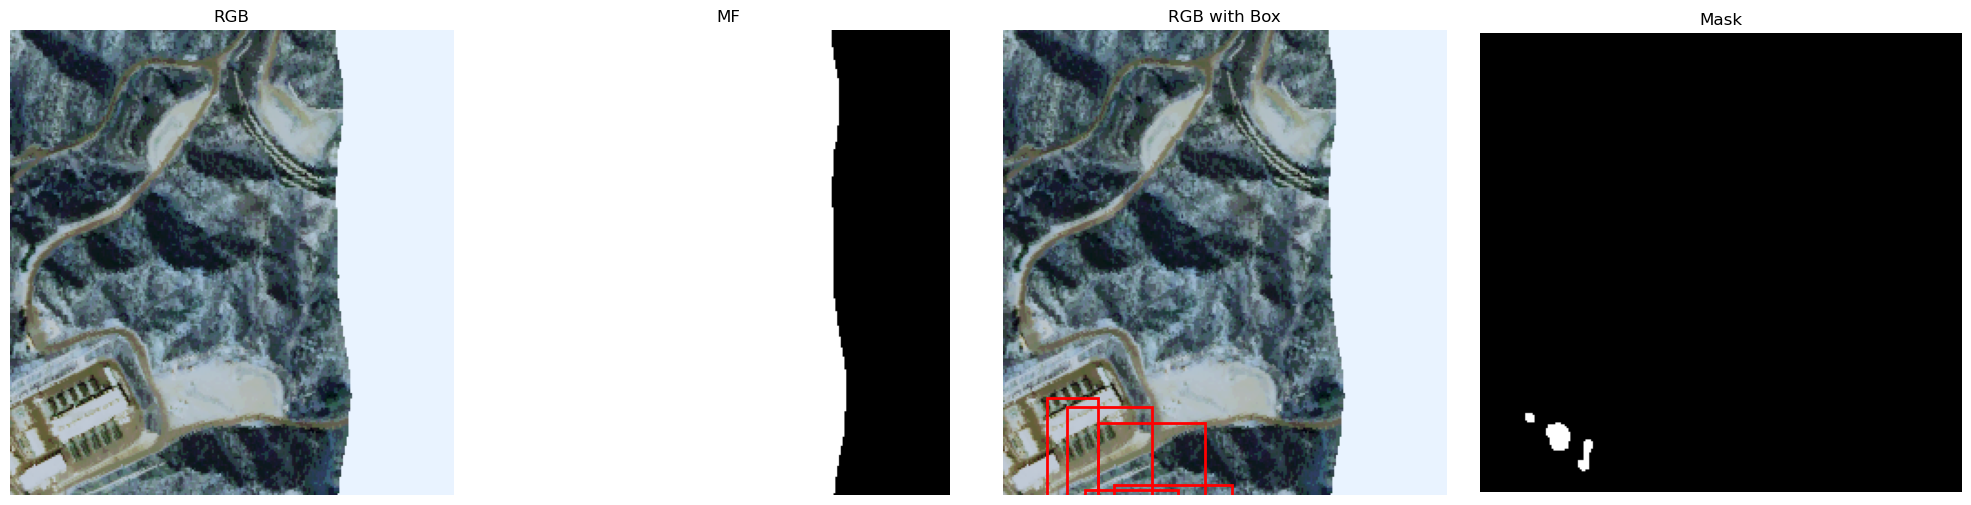

In [39]:
import matplotlib.patches as patches

# Create a figure with 1 row and 4 columns of subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot 1: RGB image
axes[0].imshow(rgb)
axes[0].set_title('RGB')
axes[0].axis('off')

# Plot 2: MF image
axes[1].imshow(mf, cmap='gray')
axes[1].set_title('MF')
axes[1].axis('off')

# Plot 3: RGB with Bounding Box
axes[2].imshow(rgb)
axes[2].set_title('RGB with Box')
axes[2].axis('off')

# Get image dimensions
h, w, _ = rgb.shape

# Iterate over each bounding box
for b in box:
  # Get box coordinates and convert from relative to absolute
  cx, cy, bw, bh = b
  abs_x = cx * w - (bw * w / 2)
  abs_y = cy * h - (bh * h / 2)
  abs_w = bw * w
  abs_h = bh * h

  # Create a Rectangle patch and add it to the plot
  rect = patches.Rectangle((abs_x, abs_y), abs_w, abs_h, linewidth=2, edgecolor='r', facecolor='none')
  axes[2].add_patch(rect)

# Plot 4: Mask
# Combine all masks by taking the logical OR along the first dimension
combined_mask = mask.any(dim=0)

# I DID A TRANSPOSEEEEEEEE !!!!!!!!!!!!!!!!!
axes[3].imshow(combined_mask.T, cmap='gray') # I DID A TRANSPOSEEEEEEEE
axes[3].set_title('Mask')
axes[3].axis('off')

plt.tight_layout()
plt.show()

In [40]:
import torch
import numpy as np
import cv2
from pathlib import Path

def visualize_output_sample(sample, output_filename="visualization.png"):
    """
    Visualizes a single sample from the HyperSegment dataset's final output.

    Args:
        sample (dict): A dictionary containing the 'rgb' tensor and 'target' dict.
        output_filename (str): The path where the output image will be saved.
    """
    # --- 1. Un-normalize the image tensor ---
    rgb_tensor = sample['rgb']
    
    # These are the standard ImageNet statistics used in your transforms
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    
    # Move tensor to CPU, clone it, and reverse the normalization
    vis_img_tensor = rgb_tensor.cpu().clone() * std + mean
    
    # Convert the tensor to a NumPy array for OpenCV:
    # (C, H, W) -> (H, W, C), scale from [0,1] to [0,255], change type to uint8
    vis_img = vis_img_tensor.permute(1, 2, 0).numpy() * 255
    vis_img = vis_img.astype(np.uint8)
    # Convert from RGB (PyTorch) to BGR (OpenCV) and ensure it's writable
    vis_img = cv2.cvtColor(vis_img, cv2.COLOR_RGB2BGR)
    vis_img = np.ascontiguousarray(vis_img)

    # --- 2. Un-normalize the bounding boxes ---
    target = sample['target']
    h, w = target['size'] # Get image dimensions (e.g., [256, 256])
    
    if 'boxes' in target and target['boxes'].nelement() > 0:
        # The output boxes are normalized [center_x, center_y, width, height]
        normalized_boxes = target['boxes'].cpu().clone()
        
        # Convert to pixel coordinates [xmin, ymin, xmax, ymax]
        boxes_xyxy = torch.zeros_like(normalized_boxes)
        boxes_xyxy[:, 0] = (normalized_boxes[:, 0] - normalized_boxes[:, 2] / 2) * w
        boxes_xyxy[:, 1] = (normalized_boxes[:, 1] - normalized_boxes[:, 3] / 2) * h
        boxes_xyxy[:, 2] = (normalized_boxes[:, 0] + normalized_boxes[:, 2] / 2) * w
        boxes_xyxy[:, 3] = (normalized_boxes[:, 1] + normalized_boxes[:, 3] / 2) * h

        # --- 3. Draw the bounding boxes on the image ---
        for box in boxes_xyxy:
            xmin, ymin, xmax, ymax = map(int, box)
            cv2.rectangle(vis_img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2) # Green box

    # --- 4. Save the visualized image ---
    output_path = Path(output_filename)
    output_path.parent.mkdir(parents=True, exist_ok=True)
    cv2.imwrite(str(output_path), vis_img)
    print(f"Saved visualization to {output_path}")

In [41]:
# visualize_output_sample(dataset_train[5])

## DEBUG LoadItem

In [42]:
import json
import glob

In [43]:
class LoadItems:
    def __init__(self, img_folder, ann_file, stats_file):
        # load dataset
        self.anns, self.imgs = dict(), dict()
        self.img_dir = img_folder # methanemapper/data/train
        self.mean = None
        self.std = None

        if not ann_file == None:
            print("loading annotations into memory...")
            try:
                dataset = json.load(open(ann_file, "r"))
                assert type(dataset) == dict, "annotation file format {} not supported".format(type(dataset))
                self.dataset = dataset
                self.createList()
                self.createPaths()
            except Exception as e:
                print(f"Warning: Error loading annotations: {e}")
                # Initialize empty data structures as fallback
                self.anns = {}
                self.img_id = {}
                self.patch_id = {}
                self.rgb_paths = []
                self.mf_paths = []
                self.raw_paths = []

        if not stats_file == None:
            print("loading mean and std for each band...")
            try:
                self.mean = np.load(f"{stats_file}/dataset_mean.npy")
                self.std = np.load(f"{stats_file}/dataset_std.npy")
            except Exception as e:
                print(f"Warning: Error loading statistics: {e}")
                # Use default values as fallback
                self.mean = np.zeros(90)
                self.std = np.ones(90)

    def createList(self):
        # create list of all images and annotations
        print("creating annotations list")
        anns, img_id, patch_id = dict(), dict(), dict()
        # FIXED : fix the missing annotations because of same file names
        unq_id = 1  # assigning a id to each image file, at train time it's the image id
        
        if "annotations" in self.dataset:
            for ann in self.dataset["annotations"]:
                try:
                    # Use get method with defaults to handle missing keys
                    patch_name = ann.get('patch_name', f"unknown_{unq_id}")
                    anns[f"{patch_name}"] = {
                        "segmentation": ann.get('segmentation', []),
                        "bbox": ann.get('bbox', [0, 0, 10, 10]),  # default small box
                        "category_id": ann.get('category_id', 1),  # default category
                        "image_id": unq_id,
                    }
                    img_id[f"{patch_name}"] = ann.get('image_id', f"img_{unq_id}")
                    patch_id[f"{patch_name}"] = ann.get('patch_id', f"patch_{unq_id}")
                    unq_id += 1
                except Exception as e:
                    print(f"Warning: Error processing annotation: {e}")
                    continue
            
            if anns:
                print(f"Successfully loaded {len(anns)} annotations")
                print("Sample annotation:", next(iter(anns.values())))
        else:
            print("Warning: No 'annotations' key found in dataset")

        # create class members
        self.anns = anns
        self.img_id = img_id
        self.patch_id = patch_id

    def createPaths(self):
        # create a list of all rgb, mf, raw images
        print("creating image paths list")
        rgb_paths, mf_paths, raw_paths = [], [], []

        # Process each annotation
        for _ann_key in list(self.anns.keys()):
            try:
                _iid = self.img_id.get(_ann_key, "unknown")
                _pid = self.patch_id.get(_ann_key, "unknown")
                
                # Find RGB file
                rgb_glob = glob.glob(f"{self.img_dir}/rgb_tiles/{_iid}_*/*_{_pid}.npy")
                if not rgb_glob:
                    # print(f"Warning: No RGB file found for {_iid}, {_pid}")
                    continue
                
                _rgb = rgb_glob[0]
                _tmp = _rgb.split("/")
                
                # Construct MF and RAW paths
                _mf = f"{self.img_dir}/mf_tiles/{_tmp[-2]}/{_tmp[-1]}"
                _raw = f"{self.img_dir}/rdata_tiles/{_tmp[-2]}/{_tmp[-1]}"
                
                # Verify file existence
                if not (Path(_mf).exists() and Path(_raw).exists()):
                    # print(f"Warning: Missing files for {_ann_key}: MF={Path(_mf).exists()}, RAW={Path(_raw).exists()}")
                    continue
                
                print(f"Found {_ann_key}")
                rgb_paths.append(_rgb)
                mf_paths.append(_mf)
                raw_paths.append(_raw)
                
            except Exception as e:
                print(f"Warning: Error processing paths for {_ann_key}: {e}")
                continue

        print(f"Found {len(rgb_paths)} valid image sets out of {len(self.anns)} annotations")
        
        if len(rgb_paths) == 0:
            print("Warning: No valid image paths found. Using empty lists.")

        # create class members
        self.rgb_paths = rgb_paths
        self.mf_paths = mf_paths
        self.raw_paths = raw_paths


In [44]:
data_items = LoadItems("data/train/training_data16171819",
                       "data/annotations_16171819/annotations_16171819.json",
                       "data/data_stats")

loading annotations into memory...
creating annotations list
Successfully loaded 13885 annotations
Sample annotation: {'segmentation': [[[36, 58], [35, 59], [34, 60], [34, 61], [34, 62], [34, 63], [35, 64], [36, 65], [37, 65], [38, 65], [39, 65], [40, 66], [41, 65], [42, 64], [43, 64], [43, 63], [43, 62], [42, 61], [41, 61], [40, 60], [39, 59], [38, 59], [37, 58]]], 'bbox': [[58, 34, 66, 43]], 'category_id': [1], 'image_id': 1}
creating image paths list
Found ang20160910t185702_S00006_20_4
Found ang20160910t185702_S00006_19_2
Found ang20160910t185702_S00006_20_3
Found ang20160910t185702_S00006_20_2
Found ang20160910t185702_S00006_19_3
Found ang20160910t185702_S00006_19_4
Found 6 valid image sets out of 13885 annotations
loading mean and std for each band...


In [45]:
# I looked up the paths that the script pulled from the annotations.json
# and apparently there are only 6 with the same name as the folder I downloaded

# # find all annotation keys containing the substring
# matches = [k for k in data_items.anns if "ang20160910t185702" in k]
# print(matches)
# print(len(matches))

# Trying to do forward

In [46]:
from torch.utils.data import DataLoader
import util.misc as utils

In [47]:
device = torch.device(args.device)
print(device)

cuda


In [48]:
id = 5
print(dataset_train[id])

rgb_img = dataset_train[id]['rgb'].permute(1, 2, 0).unsqueeze(0)
mf_img = dataset_train[id]['mf'].unsqueeze(0)
raw_img = dataset_train[id]['raw'].unsqueeze(0)
targets = dataset_train[id]['target']

{'rgb': tensor([[[ 1.1358,  0.5707,  0.1083,  ...,  2.2489,  2.2489,  2.2489],
         [ 0.8104,  0.4679,  0.2453,  ...,  2.2489,  2.2489,  2.2489],
         [ 0.7419,  1.0502,  0.8104,  ...,  2.2489,  2.2489,  2.2489],
         ...,
         [ 0.2453,  0.1083,  0.1083,  ...,  2.2489,  2.2489,  2.2489],
         [ 1.0159,  0.5707,  0.1083,  ...,  2.2489,  2.2489,  2.2489],
         [ 1.2385,  1.1015,  0.5707,  ...,  2.2489,  2.2489,  2.2489]],

        [[ 1.4832,  0.9755,  0.6604,  ...,  2.4286,  2.4286,  2.4286],
         [ 1.1856,  0.9755,  0.6604,  ...,  2.4286,  2.4286,  2.4286],
         [ 1.1856,  1.4832,  1.1856,  ...,  2.4286,  2.4286,  2.4286],
         ...,
         [ 0.2402,  0.2402,  0.2402,  ...,  2.4286,  2.4286,  2.4286],
         [ 1.1856,  0.6604,  0.2402,  ...,  2.4286,  2.4286,  2.4286],
         [ 1.3431,  1.1856,  0.6604,  ...,  2.4286,  2.4286,  2.4286]],

        [[ 1.7685,  0.9145,  0.5311,  ...,  2.6400,  2.6400,  2.6400],
         [ 1.3154,  0.9145,  0.6879, 

In [49]:
sampler_train = torch.utils.data.RandomSampler(dataset_train)
batch_sampler_train = torch.utils.data.BatchSampler(sampler_train, args.batch_size, drop_last=True)

data_loader_train = DataLoader(
    dataset_train,
    batch_sampler=batch_sampler_train,
    collate_fn=utils.collateHyperData,
    num_workers=args.num_workers,
)

In [85]:
batch = next(iter(data_loader_train))
print(batch)

(tensor([[[[-1.0219, -1.0219, -0.6623,  ...,  2.2489,  2.2489,  2.2489],
          [-0.6623, -1.0219, -0.8335,  ...,  2.2489,  2.2489,  2.2489],
          [-0.6623, -1.0219, -0.8335,  ...,  2.2489,  2.2489,  2.2489],
          ...,
          [-0.4911,  0.3652,  0.4679,  ...,  2.2489,  2.2489,  2.2489],
          [-0.0287,  0.3652,  0.4679,  ...,  2.2489,  2.2489,  2.2489],
          [-0.0287,  0.3652,  0.5707,  ...,  2.2489,  2.2489,  2.2489]],

         [[-0.8978, -0.8978, -0.2850,  ...,  2.4286,  2.4286,  2.4286],
          [-0.2850, -0.8978, -0.2850,  ...,  2.4286,  2.4286,  2.4286],
          [-0.2850, -0.8978, -0.2850,  ...,  2.4286,  2.4286,  2.4286],
          ...,
          [-0.2850,  0.9755,  0.9755,  ...,  2.4286,  2.4286,  2.4286],
          [ 0.2402,  0.9755,  0.9755,  ...,  2.4286,  2.4286,  2.4286],
          [ 0.2402,  0.9755,  0.9755,  ...,  2.4286,  2.4286,  2.4286]],

         [[-0.7064, -0.5844, -0.1487,  ...,  2.6400,  2.6400,  2.6400],
          [-0.3578, -0.5844, 

In [52]:
from models import build_model

In [76]:
model, criterion, postprocessors = build_model(args)
model.to(device)

MMsegm(
  (detr): MethaneMapper(
    (transformer): Transformer(
      (encoder): TransformerEncoder(
        (layers): ModuleList(
          (0): TransformerEncoderLayer(
            (self_attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
            )
            (linear1): Linear(in_features=256, out_features=2048, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
            (linear2): Linear(in_features=2048, out_features=256, bias=True)
            (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
            (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
            (dropout1): Dropout(p=0.1, inplace=False)
            (dropout2): Dropout(p=0.1, inplace=False)
          )
          (1): TransformerEncoderLayer(
            (self_attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)

In [86]:
rgb_img, mf_img, raw_img, targets = batch
rgb_img = rgb_img.to(device)
mf_img = mf_img.to(device)
raw_img = raw_img.to(device)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

outputs = model(rgb_img, mf_img, raw_img)

In [87]:
print(outputs)

{'pred_logits': tensor([[[-8.9870e-02,  2.7396e-02, -1.9987e-01],
         [-5.6666e-02, -1.8513e-01, -1.5672e-01],
         [ 5.3772e-01,  6.8088e-01,  2.3646e-01],
         [ 8.8064e-01, -7.1994e-02,  2.2332e-01],
         [ 1.3219e+00,  3.3946e-01, -2.2622e-01],
         [-6.3077e-02, -8.3240e-01,  8.2247e-01],
         [-5.4809e-02,  1.7443e-01,  3.3204e-01],
         [ 1.7380e+00, -2.9850e-01,  4.6691e-01],
         [-2.6770e-01,  7.1815e-01,  2.3235e-01],
         [ 1.8599e-01, -2.2152e-01,  1.7134e-03],
         [-6.5140e-02,  8.3840e-01,  4.2674e-01],
         [ 9.3908e-01,  1.0332e-01, -1.6194e-01],
         [ 9.8699e-01, -1.7993e-01, -7.0513e-02],
         [ 9.5815e-01,  9.0053e-01, -4.9301e-01],
         [ 1.0890e+00,  2.2265e-01, -7.8138e-01],
         [-4.7448e-01,  2.0814e-01,  4.9766e-01],
         [-2.1205e-01,  3.2969e-01,  8.0451e-03],
         [-5.6340e-02, -2.9440e-02,  4.0135e-01],
         [-4.8636e-02,  4.8689e-01,  1.9602e-01],
         [-5.2487e-01, -2.5172e-01

In [88]:
# Get original target sizes from the targets list
orig_target_sizes = torch.stack([t["orig_size"] for t in targets], dim=0)

# Apply the bounding box postprocessor
results = postprocessors["bbox"](outputs, orig_target_sizes)

# If segmentation postprocessor exists, apply it as well
if "segm" in postprocessors.keys():
  target_sizes = torch.stack([t["size"] for t in targets], dim=0)
  results = postprocessors["segm"](results, outputs, orig_target_sizes, target_sizes)

# Print the final processed results
print(results)

[{'scores': tensor([0.3723, 0.3592, 0.3988, 0.5252, 0.6301, 0.2572, 0.3372, 0.7087, 0.5029,
        0.4005, 0.4836, 0.5662, 0.6029, 0.4591, 0.6351, 0.3520, 0.4335, 0.2847,
        0.4286, 0.3670, 0.4419, 0.4260, 0.5110, 0.3943, 0.3104, 0.7280, 0.3555,
        0.3781, 0.5172, 0.4811, 0.6295, 0.4488, 0.5449, 0.5712, 0.6355, 0.6471,
        0.4696, 0.4157, 0.6287, 0.4468, 0.4773, 0.5557, 0.4759, 0.3037, 0.5556,
        0.5233, 0.4801, 0.3252, 0.4811, 0.3486, 0.3241, 0.6045, 0.4512, 0.4565,
        0.4294, 0.4452, 0.2962, 0.4456, 0.4213, 0.4428, 0.3557, 0.4268, 0.3018,
        0.5411, 0.4927, 0.3133, 0.4470, 0.5566, 0.4824, 0.5314, 0.3867, 0.4404,
        0.4119, 0.3682, 0.4513, 0.4808, 0.5818, 0.5725, 0.4908, 0.7527, 0.4542,
        0.3583, 0.6658, 0.3122, 0.5133, 0.7352, 0.5376, 0.4854, 0.6426, 0.4811,
        0.3429, 0.4088, 0.4366, 0.5978, 0.3756, 0.7003, 0.3677, 0.5375, 0.4313,
        0.3831], device='cuda:0'), 'labels': tensor([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1

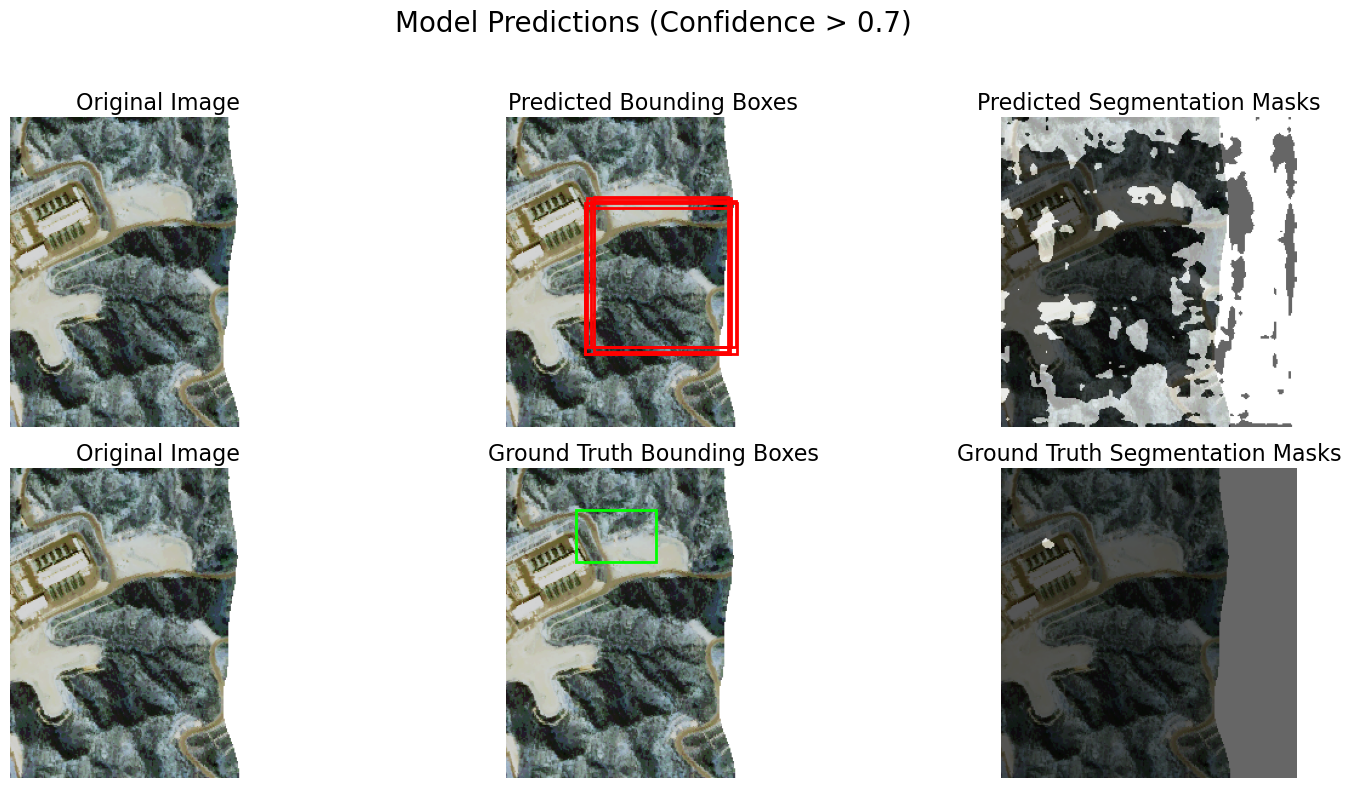

In [103]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set a confidence threshold to filter weak predictions
CONFIDENCE_THRESHOLD = 0.7

# --- 1. Prepare Image for Visualization ---
# Get the image tensor from the batch, move to CPU, and un-normalize
img_tensor = rgb_img.tensors[0].cpu()
mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
vis_img_tensor = img_tensor * std + mean
vis_img_tensor = torch.clamp(vis_img_tensor, 0, 1) # Ensure values are in [0, 1]

# Permute dimensions from (C, H, W) to (H, W, C) for matplotlib
vis_img = vis_img_tensor.permute(1, 2, 0).numpy()

# --- 2. Prepare Prediction Data ---
# Move all relevant prediction tensors to the CPU for plotting
pred_scores = results[0]['scores'].cpu()
pred_boxes = results[0]['boxes'].cpu()
pred_masks = results[0]['masks'].cpu()

# Filter predictions based on the confidence threshold
keep = pred_scores > CONFIDENCE_THRESHOLD
filtered_boxes = pred_boxes[keep]
filtered_masks = pred_masks[keep]

# --- 3. Create the Visualization Plot ---
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
# flatten the 2×3 axes grid into a 1D array so axes[0]…axes[5] work
axes = axes.flatten()
fig.suptitle(f"Model Predictions (Confidence > {CONFIDENCE_THRESHOLD})", fontsize=20)

# --- Plot 1: Original RGB Image ---
axes[0].imshow(vis_img)
axes[0].set_title("Original Image", fontsize=16)
axes[0].axis('off')

# --- Plot 2: Predicted Bounding Boxes ---
axes[1].imshow(vis_img)
axes[1].set_title("Predicted Bounding Boxes", fontsize=16)
axes[1].axis('off')

# Overlay predicted bounding boxes
if filtered_boxes.nelement() > 0:
  for b in filtered_boxes:
    # Predicted boxes are already in [xmin, ymin, xmax, ymax] format
    xmin, ymin, xmax, ymax = b
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='red', facecolor='none')
    axes[1].add_patch(rect)

# --- Plot 3: Predicted Segmentation Masks ---
axes[2].imshow(vis_img)
axes[2].set_title("Predicted Segmentation Masks", fontsize=16)
axes[2].axis('off')

# Overlay combined predicted mask if any predictions passed the filter
if filtered_masks.nelement() > 0:
  # Combine all filtered masks by taking the logical OR
  combined_pred_mask = filtered_masks.any(dim=0).squeeze(0).numpy()
  # Overlay the combined mask with transparency
  axes[2].imshow(combined_pred_mask, cmap='gray', alpha=0.6)

# --- 2. Prepare Ground Truth Data ---
# Get the first target from the batch and move its tensors to CPU
gt_target = {k: v.cpu() for k, v in targets[0].items()}
gt_boxes = gt_target['boxes']
gt_masks = gt_target['masks']
h, w = gt_target['orig_size'] # Use original size for coordinate conversion

# --- Plot 4: Original RGB Image ---
axes[3].imshow(vis_img)
axes[3].set_title("Original Image", fontsize=16)
axes[3].axis('off')

# --- Plot 5: Ground Truth Bounding Boxes ---
axes[4].imshow(vis_img)
axes[4].set_title("Ground Truth Bounding Boxes", fontsize=16)
axes[4].axis('off')

# Overlay ground truth bounding boxes
if gt_boxes.nelement() > 0:
  for b in gt_boxes:
    # Convert normalized [cx, cy, w, h] to absolute [xmin, ymin, width, height]
    cx, cy, bw, bh = b
    xmin = (cx - bw / 2) * w
    ymin = (cy - bh / 2) * h
    box_w = bw * w
    box_h = bh * h
    rect = patches.Rectangle((xmin, ymin), box_w, box_h, linewidth=2, edgecolor='lime', facecolor='none')
    axes[4].add_patch(rect)

# --- Plot 6: Ground Truth Segmentation Masks ---
axes[5].imshow(vis_img)
axes[5].set_title("Ground Truth Segmentation Masks", fontsize=16)
axes[5].axis('off')

# Overlay combined ground truth mask if it exists
if gt_masks.nelement() > 0:
  # Combine all ground truth masks by taking the logical OR
  combined_gt_mask = gt_masks.any(dim=0).numpy()
  # Overlay the combined mask with transparency
  axes[5].imshow(combined_gt_mask, cmap='gray', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
